<a href="https://colab.research.google.com/github/drashtichauhan20/Predictive_analytics/blob/main/dissertation_v2_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Libraries

In [56]:
#conda install -c conda-forge pandas-profiling

In [57]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [58]:
#!pip install tensorflow

In [59]:
#!pip install keras

In [60]:
#!pip install wordcloud

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import plot_confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
# import pandas_profiling
# from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h3> Data Importing and Acquisition

In [62]:
#importing dataset
path = "https://github.com/drashtichauhan20/Predictive_analytics/blob/main/clothing_review.csv?raw=true"
df = pd.read_csv(path)
df.head() #showing first 5 data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [63]:
df.tail() #showing last 5 data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [64]:
df.sample(5) #showing data randomly

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
22308,22308,1077,32,Beautiful dress!,Love this dress! very flattering. material is ...,5,1,0,General Petite,Dresses,Dresses
3647,3647,942,49,Versatile piece,I purchased this in gray and it is proving to ...,4,1,1,General,Tops,Sweaters
4378,4378,1081,51,Casual summer dress,I ordered this dress in the black motif and a ...,4,1,0,General Petite,Dresses,Dresses
11803,11803,1079,31,"Very cute, but runs small and buttons break","I saw this dress online, and i thought it was ...",2,0,3,General,Dresses,Dresses
18645,18645,867,42,Perfect leggings top,I bought a few of these tops in the long sleev...,5,1,1,General Petite,Tops,Knits


<h3> Data Wrangling

In [65]:
df.shape #shape of the data

(23486, 11)

**Data has 23486 rows and 11 columns**

In [66]:
df.dtypes #checking the datatypes of each columns

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [67]:
df.columns #showing all the columns of the dataset

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

**Dataset has following columns:**
1. Unnamed : Showing the numbers of entries
2. Clothing ID: Unique int number 
3. Age
4. Title
5. Review text
6. Rating
7. Recommended IND
8. Positive Feedback Count
9. Division Name
10. Department Name
11. Class Name

**As we don't required all the columns from the dataset i will remove unnecessary columns from the data which are Title, Clothing Id and Positive feedback counts**

In [68]:
#droping the columns
df = df.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [69]:
df.isnull().sum().sort_values(ascending=False) #checking for null values in the dataset

Review Text        845
Class Name          14
Department Name     14
Division Name       14
Recommended IND      0
Rating               0
Age                  0
Unnamed: 0           0
dtype: int64

**It is not possible to replace the Text features. so, I am going to drop the missing rows from the dataset.**

In [70]:
# Dropping the missing values in the rows
df = df.dropna(subset=['Review Text', 'Division Name', 'Department Name', 'Class Name'], axis=0)
df = df.reset_index(drop=True)

In [71]:
# Checking for the missing values after the drops
count_missing_val = df.isnull().sum()
count_missing_val

Unnamed: 0         0
Age                0
Review Text        0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

**Renaming the columns**

In [72]:
df.rename(columns={
    'Unnamed: 0' : 'id',
    'Age' : 'age',
    'Review Text' : 'review_text',
    'Rating' : 'rating',
    'Recommended IND' : 'recommended_IND',
    'Division Name' : 'division_name',
    'Department Name' : 'department_name',
    'Class Name' : 'class_name'
},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               22628 non-null  int64 
 1   age              22628 non-null  int64 
 2   review_text      22628 non-null  object
 3   rating           22628 non-null  int64 
 4   recommended_IND  22628 non-null  int64 
 5   division_name    22628 non-null  object
 6   department_name  22628 non-null  object
 7   class_name       22628 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


<h3> Exploratory Data Analysis

**Showing statistical description of the dataset**

In [73]:
#statistical summary of the data 
df.describe()

,id,age,rating,recommended_IND
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,43.282880,4.183092,0.818764
std,6781.574232,12.328176,1.115911,0.385222
min,0.000000,18.000000,1.000000,0.000000
25%,5868.750000,34.000000,4.000000,1.000000
50%,11727.500000,41.000000,5.000000,1.000000
75%,17617.250000,52.000000,5.000000,1.000000
max,23485.000000,99.000000,5.000000,1.000000


**Rating Distribution**

In [74]:
# #ploting histogram for seeing how rating is distributed using plotly
# fig = px.histogram(df['rating'],
#                    labels={'value': 'rating',
#                            'count': 'Frequency',
#                            'color': 'rating'}, color=df['rating'])
# #fig.update_layout(bargap=0.2)
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #setting the figure layout
# fig.update_layout(title_text='Rating Distribution',
#                   title_x=0.5, title_font=dict(size=18)) #titles of the graph
# fig.show() #showing figure

**Observation:** As we can see from the above histogram rating 5 has the highest frequency count which is more than 12000 and the rating 1 has appeared least

**Age distribution of the customer**

In [75]:
#plotting the histogram using plotly to see the age distribution of customers 
fig = px.histogram(df['age'],marginal='box',labels={'Value : age'}) #marginal set to 'box' to show box subplot above 

fig.update_traces(marker=dict(line=dict(color='#000000', width=1))) #setting the layout of a figure
fig.update_layout(title_text='Age Distribution',
                  title_x=0.5, title_font=dict(size=18))
fig.show()

**Observation:** From above historam and box plot we can see the contribution of the people aged 39 has the highest and people from age between 34 to 52 contributed more than other age groups.

**Bar graph to show if the product was recommended or not by customer**

Text(0.5, 15.0, 'Recommended (0=false, 1=True)')

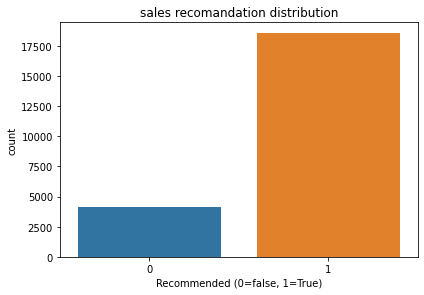

In [76]:
fig=sns.countplot(x='recommended_IND',data=df)
plt.tight_layout()
plt.title('sales recomandation distribution')
plt.xlabel('Recommended (0=false, 1=True)')

**Observation:** Above graph shows that most of the product was recomended by the customers

**Relationship between age and recomandation**

<h1>Continued

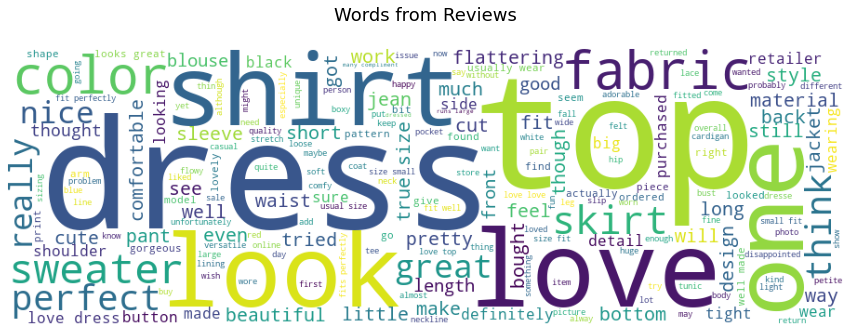

In [77]:
rev = df['review_text']

plt.subplots(figsize=(15,6))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rev))
plt.imshow(wordcloud)
plt.title('Words from Reviews\n',size=18)
plt.axis('off')
plt.show()

In [78]:
# words = df['review_text'].str.split(expand=True).stack().value_counts()
# words_top = words[:100]

# fig = px.treemap(words_top, path=[words_top.index], values=0)
# fig.update_layout(title_text='Top Frequent 100 Words in the Dataset (Before Cleaning)',
#                   title_x=0.5, title_font=dict(size=20)
#                   )
# fig.update_traces(textinfo="label+value")
# fig.show()

<h3> Data Preprocessing

**Creating class for different ratings**
1. Rating 4 or higher: Positive 
2. Rating 3: Neutral 
3. Rating 2 or less: Negative

In [79]:
def rev_class (row):
  if row['rating'] >= 4:
    return 'Positive'
  if row['rating'] == 3:
    return 'Neutral'
  if row['rating'] <= 2:
    return 'Negative'

df['revclass'] = df.apply(lambda row: rev_class(row), axis=1)
df.head()

,id,age,review_text,rating,recommended_IND,division_name,department_name,class_name,revclass
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


**In this part I will be dealing with the cleaning of the text data**

In [80]:
df['review_text'] = df['review_text'].str.lower() #Converting all the text into the lower case
df['review_text'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress!  it's sooo pretty.  i happene...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: review_text, dtype: object

In [81]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


df['review_text'] = df['review_text'].apply(remove_punctuations_numbers)

In [82]:
df['review_text'].head() 

0    absolutely wonderful   silky and sexy and comf...
1    love this dress   it s sooo pretty   i happene...
2    i had such high hopes for this dress and reall...
3    i love  love  love this jumpsuit  it s fun  fl...
4    this shirt is very flattering to all due to th...
Name: review_text, dtype: object

**Tokenizing data with the NLTK library**

In [83]:
def tokenization(inputs):  # defining the function to tokenize the review text
    return word_tokenize(inputs)


df['tokenized_txt'] = df['review_text'].apply(tokenization)
df['tokenized_txt'].head()

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
Name: tokenized_txt, dtype: object

**Removing Stopwords**

In [84]:
stop_words = set(stopwords.words('english')) #
stop_words.remove('not')

def stopwords_remove(inputs):  # defining the function to remove stop words
    return [i for i in inputs if i not in stop_words] #return the words which are not in stopwords


df['stop_txt'] = df['tokenized_txt'].apply(stopwords_remove)
df['stop_txt'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: stop_txt, dtype: object

**Lemmatization**

In [85]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # 
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]

df['lemmatized_txt'] = df['stop_txt'].apply(lemmatization)
df['lemmatized_txt'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, stor...
2    [high, hop, dress, really, want, work, initial...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flatter, due, adjustable, front, tie, ...
Name: lemmatized_txt, dtype: object

In [86]:
# Removing Words less than length 2
def remove_words(inputs):  # removing words which are less than len 2
    return [i for i in inputs if len(i) > 2]


df['final_txt'] = df['lemmatized_txt'].apply(remove_words)

In [87]:
#joining Tokens into Sentences
df['final_txt'] = df['final_txt'].str.join(' ')
df['final_txt'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final_txt, dtype: object

In [88]:
# words = df['final_txt'].str.split(expand=True).stack().value_counts()
# words_top = words[:100]

# fig = px.treemap(words_top, path=[words_top.index], values=0)
# fig.update_layout(title_text='Top Frequent 100 Words in the Dataset (After Cleaning)',
#                   title_x=0.5, title_font=dict(size=20)
#                   )
# fig.update_traces(textinfo="label+value")
# fig.show()

In [89]:
#spliting negative and positive words from cleaned text
neg_words = " ".join(df[df["recommended_IND"] == 0].final_txt).split()
print("Printing negative words from the review text")
print(neg_words)

Printing negative words from the review text
['high', 'hop', 'dress', 'really', 'want', 'work', 'initially', 'order', 'petite', 'small', 'usual', 'size', 'find', 'outrageously', 'small', 'small', 'fact', 'could', 'not', 'zip', 'reorder', 'petite', 'medium', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layer', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sew', 'directly', 'zipper', 'love', 'tracy', 'reese', 'dress', 'one', 'not', 'petite', 'feet', 'tall', 'usually', 'wear', 'brand', 'dress', 'pretty', 'package', 'lot', 'dress', 'skirt', 'long', 'full', 'overwhelm', 'small', 'frame', 'not', 'stranger', 'alterations', 'shorten', 'narrow', 'skirt', 'would', 'take', 'away', 'embellishment', 'garment', 'love', 'color', 'idea', 'style', 'not', 'work', 'return', 'dress', 'dress', 'run', 'small', 'esp', 'zipper', 'area', 'run', 'order', 'typically', 'fit', 'tight', 'material', 'top', 'look', 'feel', '

In [90]:
pos_words = " ".join(df[df["recommended_IND"] == 1].final_txt).split()
# print("Prinitng positive words from the review text")
# print(pos_words)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               22628 non-null  int64 
 1   age              22628 non-null  int64 
 2   review_text      22628 non-null  object
 3   rating           22628 non-null  int64 
 4   recommended_IND  22628 non-null  int64 
 5   division_name    22628 non-null  object
 6   department_name  22628 non-null  object
 7   class_name       22628 non-null  object
 8   revclass         22628 non-null  object
 9   tokenized_txt    22628 non-null  object
 10  stop_txt         22628 non-null  object
 11  lemmatized_txt   22628 non-null  object
 12  final_txt        22628 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.2+ MB


<h3>User-Defined-Function to compare models

**I will use this model at the end to compare the results**

In [92]:
def evaluation(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(5, 5))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

<h3> Sentiment classification with Machine Learning

**Train, Test & Split**

In [93]:
X = df["final_txt"]
y= df["recommended_IND"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

**Vectorization**

**For machine learning algorithms to work I need to convert text files into numerical feature vectors.**

In [94]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [95]:
type(X_train_count)

scipy.sparse.csr.csr_matrix

In [96]:
X_train_count.toarray() #converting into array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aaaaaaamazing',
 'aaaaandidon',
 'aaaaannnnnnd',
 'aaaahmazing',
 'aaaahs',
 'aaahed',
 'aame',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abdominal',
 'abercrombie',
 'abhor',
 'ability',
 'abject',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'abolutely',
 'abou',
 'abroad',
 'abruptly',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'absorbent',
 'abstract',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abuse',
 'abut',
 'acacia',
 'accent',
 'accentuate',
 'accentuatea',
 'accept',
 'acceptable',
 'access',
 'accesso',
 'accessories',
 'accessorize',
 'accessorized',
 'accessorizer',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accomadate',
 'accommodate',
 'accomodate',
 'accompany',
 'accomplish',
 'accomplishment',
 'accord',
 'accordance',
 'accordian',
 'accordingly',
 'accordion',
 'account',
 'accumulate',
 'accuracy',
 'accurate',
 'accurately',


In [98]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,aaaaaaamazing,aaaaandidon,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,abbey,abby,abck,abdomen,abdominal,abercrombie,abhor,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,abs,absence,abso,absolute,absolutely,absolutley,absolutly,absoluty,absorbent,abstract,absurd,absurdly,abt,abundance,abundant,abuse,...,yippee,yoga,yogi,yogini,yogis,yoke,yolk,york,yoself,young,younger,youre,youth,youthful,youve,yrs,yuck,yucky,yuk,yumi,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zillion,zip,zipepr,ziploc,zipper,zippie,zombie,zone,zoom,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Logistic Regression**

In [99]:
logisticR = LogisticRegression(class_weight='balanced',max_iter=500,random_state=100).fit(X_train_count,y_train)

Logistic Regression model
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.80      0.69       820
           1       0.95      0.88      0.92      3706

    accuracy                           0.87      4526
   macro avg       0.78      0.84      0.80      4526
weighted avg       0.89      0.87      0.87      4526

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      3281
           1       0.99      0.92      0.95     14821

    accuracy                           0.93     18102
   macro avg       0.86      0.94      0.89     18102
weighted avg       0.94      0.93      0.93     18102



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



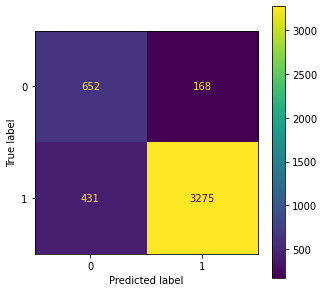

In [100]:
print("Logistic Regression model")
evaluation(logisticR,X_train_count,X_test_count)

In [101]:
scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }
for i, j in scorer.items():
    model = LogisticRegression(class_weight='balanced',max_iter=500,random_state=100)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8622248017791824

 precision-0          score for count : 0.5931545685184316

 recall-0             score for count : 0.7674642301134258

 f1-0                 score for count : 0.668912975755424

 precision-1          score for count : 0.9449430672563794

 recall-1             score for count : 0.8832053875546796

 f1-1                 score for count : 0.9130000384071006



**Naive Bayes**

Naive Bayes model
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       820
           1       0.93      0.94      0.93      3706

    accuracy                           0.89      4526
   macro avg       0.82      0.81      0.81      4526
weighted avg       0.89      0.89      0.89      4526

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3281
           1       0.95      0.94      0.94     14821

    accuracy                           0.91     18102
   macro avg       0.84      0.85      0.84     18102
weighted avg       0.91      0.91      0.91     18102



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



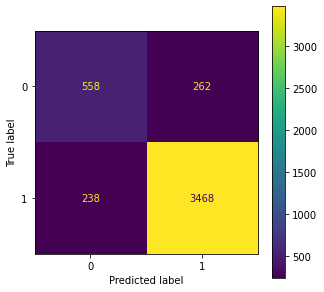

In [102]:
naiveb = MultinomialNB()
naiveb.fit(X_train_count, y_train)
print("Naive Bayes model")
evaluation(naiveb, X_train_count, X_test_count)

In [103]:
scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }
for i, j in scorer.items():
    model = naiveb = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8776378546085768

 precision-0          score for count : 0.661610779459402

 recall-0             score for count : 0.6662651049002891

 f1-0                 score for count : 0.663764082518431

 precision-1          score for count : 0.9260039865195026

 recall-1             score for count : 0.9244310917342112

 f1-1                 score for count : 0.9252050393278086



**Random Forest**

Random Forest model
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.79      0.65       820
           1       0.95      0.86      0.90      3706

    accuracy                           0.85      4526
   macro avg       0.75      0.83      0.78      4526
weighted avg       0.88      0.85      0.86      4526

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.87      0.74      3281
           1       0.97      0.89      0.93     14821

    accuracy                           0.89     18102
   macro avg       0.80      0.88      0.83     18102
weighted avg       0.91      0.89      0.89     18102



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



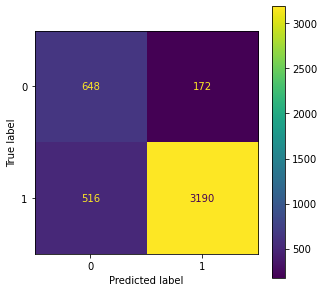

In [104]:
randomf = RandomForestClassifier(n_estimators=100, max_depth = 12, random_state = 50, n_jobs = -1, class_weight="balanced")
randomf.fit(X_train_count, y_train)
print("Random Forest model")
evaluation(randomf, X_train_count, X_test_count)

In [105]:
scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }
for i, j in scorer.items():
    model = RandomForestClassifier(n_estimators=100, max_depth = 12, random_state = 50, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.847530499617134

 precision-0          score for count : 0.5589427851727896

 recall-0             score for count : 0.7610617910890356

 f1-0                 score for count : 0.6441504453905247

 precision-1          score for count : 0.9425334734335662

 recall-1             score for count : 0.8666741741536785

 f1-1                 score for count : 0.902952173120487



**Support Vector Machine**

Support vector machine model
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.84      0.69       820
           1       0.96      0.87      0.91      3706

    accuracy                           0.86      4526
   macro avg       0.77      0.85      0.80      4526
weighted avg       0.89      0.86      0.87      4526

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.75      3281
           1       0.98      0.89      0.93     14821

    accuracy                           0.89     18102
   macro avg       0.81      0.90      0.84     18102
weighted avg       0.92      0.89      0.90     18102



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



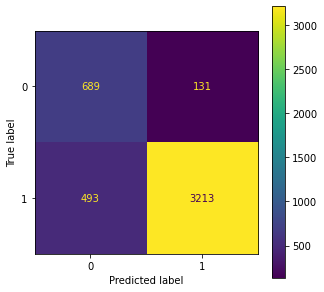

In [106]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=50)
svc.fit(X_train_count,y_train)
print("Support vector machine model")
evaluation(svc,X_train_count,X_test_count)

In [107]:
scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }
for i, j in scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=50)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8601812435362778

 precision-0          score for count : 0.5812109575511804

 recall-0             score for count : 0.8214128178515828

 f1-0                 score for count : 0.6805962941124879

 precision-1          score for count : 0.9564817082037654

 recall-1             score for count : 0.8687662605343693

 f1-1                 score for count : 0.9104913346565642



<h3> Deep Learning Modelling

In [108]:
dl = pd.read_csv('https://github.com/drashtichauhan20/Predictive_analytics/blob/main/clothing_review.csv?raw=true')
dl_df = dl.copy()
dl_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [109]:
dl_df = dl_df[["Review Text","Recommended IND"]]
dl_df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [110]:
dl_df.dropna(inplace = True)

**Tokenizer**

In [111]:
X = dl_df['Review Text'].values
y = dl_df['Recommended IND'].values

num_words = 10000 

tokenizer = Tokenizer(num_words=num_words) 
tokenizer.fit_on_texts(X)

**Creating word index**

In [112]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [113]:
len(tokenizer.word_index) #length of word index

14847

**Converting text to the numeric data**

In [114]:
X_num_tokens = tokenizer.texts_to_sequences(X)
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
np.array(X_num_tokens)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



array([list([253, 532, 917, 3, 662, 3, 68]),
       list([21, 7, 18, 33, 1713, 99, 2, 1322, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 454, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]),
       list([2, 65, 312, 178, 1095, 12, 7, 18, 3, 51, 195, 5, 8, 102, 12, 31, 2, 1152, 52, 1, 95, 46, 17, 236, 22, 10, 2, 219, 7, 8, 29, 6689, 46, 16, 46, 9, 661, 20, 2, 118, 19, 784, 5, 43, 2, 2147, 5, 9, 95, 97, 82, 15, 39, 637, 250, 1, 25, 656, 15, 68, 3, 26, 258, 10, 1, 175, 656, 65, 4, 23, 148, 272, 475, 3, 527, 718, 489, 4601, 151, 975, 1876, 4, 1877, 142, 1589, 15, 1, 4601, 151, 475, 830, 3247, 313, 1, 469, 5, 688]),
       ...,
       list([7, 26, 59, 10, 1, 25, 15, 23, 121, 203, 7, 429, 41, 24, 561, 12, 31, 36, 314, 2, 15, 427, 8, 179, 5, 11, 9, 1, 106, 3, 124, 241, 5, 136, 14, 244, 45, 5, 41, 24, 166, 34]),
       list([2, 72, 7, 18, 12, 4, 592, 2, 24, 7, 138, 3, 33, 

In [115]:
X[10] #shwoing the review of the index 10

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

In [116]:
print(X_num_tokens[10]) #showing the word index for tokens

[18, 132, 46, 3248, 353, 1, 469, 298, 132, 2, 52, 1, 1514, 82, 423, 78, 31, 3, 5, 15, 23, 148, 1, 83, 11, 1, 25, 76, 3, 309, 23, 489, 20, 101, 39, 1096, 11, 5, 55, 1759, 5, 8, 2178, 1, 45, 99, 329, 30, 5, 15, 176, 8, 29, 17, 1166, 18, 7, 440, 2294, 8, 279, 5, 55, 29, 176, 63]


In [117]:
tokenizer.word_index["nice"] #word index of word 'nice'

70

**Padding**

In [118]:
print("Mean : ",num_tokens.mean())
print("Max " ,num_tokens.max())
print("argMax",num_tokens.argmax())

Mean :  60.39287133960514
Max  116
argMax 16263


In [119]:
len(X[16263])

499

**Pad Sequence**

In [120]:
len(X_num_tokens[100])

31

In [121]:
np.array(X_num_tokens[100])

array([   1,   45,  267,  489,    3,    2,  124,  221,    5,    8,   29,
          4,   58,   25,   12,  330,    2,   38,  141,    4,   97,    9,
          1,  451,    3,   17, 1506,   27,  920,  691,  927])

In [122]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([ 7, 62, 97, ..., 42, 85, 18])

In [123]:
max_tokens = 105

In [124]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9789761936310234

In [125]:
sum(num_tokens < max_tokens)

22165

In [126]:
len(num_tokens)

22641

In [127]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [128]:
X_pad.shape

(22641, 105)

In [129]:
X_pad[106]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   54,
         18,   12,  495, 2088, 2955,  452], dtype=int32)

**Train, Test & Split**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  
# we have been using stratify to prevent imbalance.

**Modelling**

In [131]:
model = Sequential()

In [132]:
embedding_size = 100

In [133]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [134]:
model.add(GRU(units=48, return_sequences=True))  
model.add(GRU(units=24, return_sequences=True)) 
model.add(GRU(units=12)) 
model.add(Dense(1, activation='sigmoid'))  

In [135]:
optimizer = Adam(learning_rate=0.006)

In [136]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [137]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 105, 100)         1000000   
                                                                 
 gru (GRU)                   (None, 105, 48)           21600     
                                                                 
 gru_1 (GRU)                 (None, 105, 24)           5328      
                                                                 
 gru_2 (GRU)                 (None, 12)                1368      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 1,028,309
Trainable params: 1,028,309
Non-trainable params: 0
_________________________________________________________________


In [138]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [139]:
pd.Series(y_train).value_counts(normalize=True) 

1    0.818849
0    0.181151
dtype: float64

In [140]:
weights = {0:82, 1:18}

In [141]:
model.fit(X_train, y_train, epochs=30, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
71/71 [==============================] - 31s 356ms/step - loss: 13.8490 - recall: 0.7527 - val_loss: 0.4012 - val_recall: 0.7967
Epoch 2/30
71/71 [==============================] - 24s 335ms/step - loss: 8.6657 - recall: 0.8660 - val_loss: 0.3844 - val_recall: 0.8382
Epoch 3/30
71/71 [==============================] - 24s 335ms/step - loss: 6.0405 - recall: 0.9057 - val_loss: 0.3354 - val_recall: 0.8760
Epoch 4/30
71/71 [==============================] - 24s 333ms/step - loss: 4.3145 - recall: 0.9359 - val_loss: 0.3403 - val_recall: 0.8913
Epoch 5/30
71/71 [==============================] - 24s 339ms/step - loss: 3.4010 - recall: 0.9504 - val_loss: 0.3783 - val_recall: 0.8833
Epoch 6/30
71/71 [==============================] - 24s 336ms/step - loss: 2.5924 - recall: 0.9612 - val_loss: 0.4440 - val_recall: 0.8606
Epoch 7/30
71/71 [==============================] - 24s 332ms/step - loss: 2.4439 - recall: 0.9645 - val_loss: 0.4051 - val_recall: 0.9051
Epoch 8/30
71/71 [========

In [142]:
model.save('Deep_learning_d1')

INFO:tensorflow:Assets written to: Deep_learning_d1/assets


INFO:tensorflow:Assets written to: Deep_learning_d1/assets


**Model Evaluation**

In [143]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,13.849046,0.752680,0.401180,0.796711
1,8.665672,0.866024,0.384403,0.838231
2,6.040544,0.905671,0.335411,0.875977
3,4.314528,0.935945,0.340262,0.891345
4,3.401019,0.950442,0.378257,0.883257


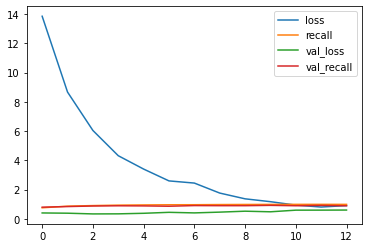

In [144]:
model_loss.plot();

In [145]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 16s 26ms/step - loss: 0.1781 - recall: 0.9242


[0.17806629836559296, 0.9242128133773804]

In [146]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 4s 25ms/step - loss: 0.3354 - recall: 0.8760


[0.3354106545448303, 0.8759773373603821]

In [147]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 3252    29]
 [ 1124 13707]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      3281
           1       1.00      0.92      0.96     14831

    accuracy                           0.94     18112
   macro avg       0.87      0.96      0.90     18112
weighted avg       0.95      0.94      0.94     18112



In [148]:
y_pred = (model.predict(X_test) >= 0.5).astype("int")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 672  148]
 [ 460 3249]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       820
           1       0.96      0.88      0.91      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.80      4529
weighted avg       0.89      0.87      0.87      4529



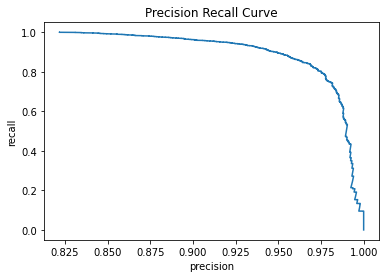

In [149]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plt.plot([1, 0], [0, 1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [150]:
from sklearn.metrics import precision_recall_curve, average_precision_score, recall_score

DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

<h3> Prediction

In [151]:
review1 = "did not Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
reviews = [review1, review2, review3, review4, review5, review6]

In [152]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape
mod_pred = model.predict(tokens_pad)
mod_pred

array([[0.27826422],
       [0.9900334 ],
       [0.9843321 ],
       [0.99314755],
       [0.99125767],
       [0.80057657]], dtype=float32)

In [153]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [154]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Recommended" if x>=0.5 else "Not Recommended")

In [157]:
df_pred

,Pred_Proba,Predicted_Feedbaack
did not Love this dress,0.278264,Not Recommended
Absolutely wonderful. silky and sexy and comfortable,0.990033,Recommended
i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!,0.984332,Recommended
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",0.993148,Recommended
This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,0.991258,Recommended
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",0.800577,Recommended


In [156]:
compare = pd.DataFrame({"Model": ["naiveb_count", "logisticR_count", "randomf_count", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1,
                                             rf_count_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, 
                                                   rf_count_rec, DL_rec]})
                        
#                         "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
#                                                    ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
#                                                    rf_AP_tfidf, ada_AP_tfidf, DL_AP]})
